# Assignment 9: SVM
Making reference to the SVM notebook introduced in class, solve the problems below.

In [1]:
# import all necessary packages here
# do not scatter import operations in the notebook

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd

## Exercise 1
Using *make_blobs*, generate 200 points, scattered around two clusters that are clearly separable by a line (plus margins).<br>
Fit a linear kernel and plot blobs and linear SVM.

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

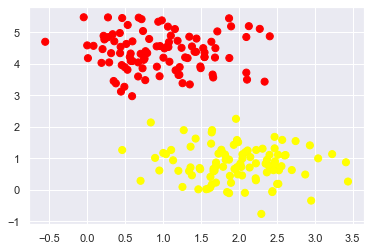

In [2]:
# write your code here

X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


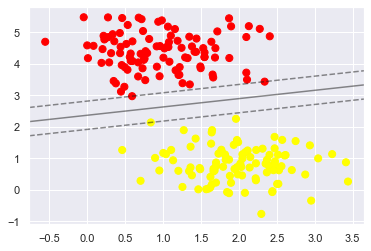

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    # N.B.: vstack() stacks arrays in sequence vertically (row wise).
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

## Exercise 2
Using *make_circles*, generate 200 points, scattered around two circles. The two clusters should not overlap.<br>
Fit an SVM "radial basis function kernel" and plot blobs and SVM model.

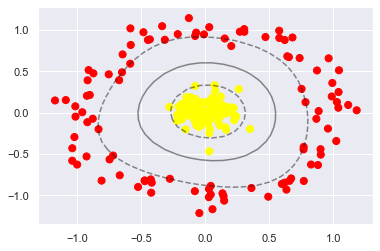

In [4]:
# write your code here
X, y = make_circles(200, factor=.1, noise=.1)

# attempting to fit with a linear SVC
clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# plotting the linear SVC
plot_svc_decision_function(clf, plot_support=False);

## Exercise 3
Using *make_circles*, generate 200 points, scattered around two clusters that are **partially overlapping**.<br>
Fit an SVM "radial basis function kernel" and plot blobs and SVM model.

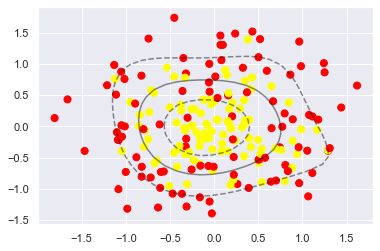

In [5]:
# write your code here
X, y = make_circles(200, factor=.4, noise=.4)

# attempting to fit with a linear SVC
clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# plotting the linear SVC
plot_svc_decision_function(clf, plot_support=False);

## Exercise 4
Continuing from Exercise 3, tune the $C$ parameter.What is the optimal value of the $C$ parameter?


In [6]:
# write your code here
def svm_mult_c(c):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # attempting to fit with a linear SVC
    clf = SVC(kernel='rbf', C = c, probability = True).fit(X_train, y_train)
    
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    res_ev = {
        "c":  c,
        "Accuracy": metrics.accuracy_score(y_test, y_pred),
        "Precision": metrics.precision_score(y_test, y_pred),
        "Recall": metrics.recall_score(y_test, y_pred)
        
    }
    
    return res_ev

In [8]:
res_list = [svm_mult_c(c) for c in np.arange (0.1, 10, 0.1)]
   

In [10]:
pd.DataFrame(res_list).sort_values(by='Accuracy', ascending=False)

,c,Accuracy,Precision,Recall
0,0.1,0.803030,0.884615,0.69697
13,1.4,0.803030,0.884615,0.69697
1,0.2,0.803030,0.884615,0.69697
23,2.4,0.803030,0.884615,0.69697
22,2.3,0.803030,0.884615,0.69697
...,...,...,...,...
70,7.1,0.772727,0.821429,0.69697
71,7.2,0.772727,0.821429,0.69697
72,7.3,0.772727,0.821429,0.69697
73,7.4,0.772727,0.821429,0.69697


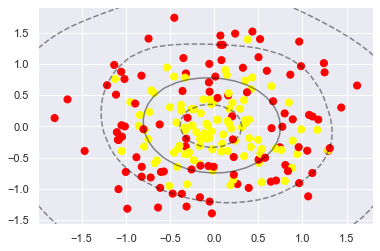

In [16]:
clf = SVC(kernel='rbf', C = 0.2).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# plotting the linear SVC
plot_svc_decision_function(clf, plot_support=False);

An C value of 0.2 produces decent results.